# `Facebook Data Crawling`
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [134]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\AD\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
raw_df = pd.read_csv('Data/lopnguoita.fp.csv')
pro_df = pd.read_csv('Data/lopnguoita.fp.csv')

## `Processing Data`


1. Loại bỏ dữ liệu trùng lặp


In [137]:
pro_df.drop_duplicates(inplace= True)

2. Chuyển đổi dữ liệu thành `lower case` đối với `text` và `post_text`


In [138]:
pro_df['text'] = pro_df['text'].str.lower()
pro_df['post_text'] = pro_df['post_text'].str.lower()

pro_df[['text', 'post_text']]

,text,post_text
0,tên ở nhà của bạn là gì?,tên ở nhà của bạn là gì?
1,mê cái cách lớp tặng quà 20/11 cho cô :3,mê cái cách lớp tặng quà 20/11 cho cô :3
2,mấy đứa nhát gái kiểu:,mấy đứa nhát gái kiểu:
3,tốt nghiệp đại học luật nhưng thơ nguyễn vẫn q...,tốt nghiệp đại học luật nhưng thơ nguyễn vẫn q...
4,“bác sĩ mở phòng khám tư thì giáo viên dạy thê...,“bác sĩ mở phòng khám tư thì giáo viên dạy thê...
...,...,...
95,thời tớiiiiiii,thời tớiiiiiii
96,bài tập của chuyên anh :3,bài tập của chuyên anh :3
97,trường học có nhà vệ sinh học sinh trị giá 600...,trường học có nhà vệ sinh học sinh trị giá 600...
98,học kiểu gì vậy??,học kiểu gì vậy??


3. Chuyển đổi `chuỗi thời gian` thành kiểu `datetime`.

In [139]:
pro_df['time'] = pd.to_datetime(pro_df['time'])
pro_df['day'] = pro_df['time'].dt.day

4. Xử lý dữ liệu với `reactions`

In [140]:
pro_df['reactions'] = pro_df['reactions'].apply(lambda x : dict(eval(x))) #Biến mỗi phần tử trong reactions thành một từ điển
list_reactions = pro_df['reactions'].apply(pd.Series) #Biến từng loại reaction thành các cột Dataframe
list_reactions = list_reactions.fillna(0)
pro_df = pd.concat([pro_df, list_reactions], axis=1).drop('reactions', axis=1) # Ghép lại bảng dữ chính

## `Analysis Data`

1. ` Đâu là bài viết có lượt tương tác lớn nhất?`

In [141]:
max_reactions_post = pro_df[pro_df['reaction_count']== pro_df['reaction_count'].max()]
max_reactions_post[['post_text', 'time', 'reaction_count']]

,post_text,time,reaction_count
33,văn nghệ cháy nhất 20.11 theo đúng nghĩa đen,2023-11-16 12:45:34,43754


2. `Số lượt tương tác trong các bài đăng thay đổi như thế nào `

In [142]:
data_from_9_to_14 = pro_df[(pro_df['day'] >= 9) & (pro_df['day'] <= 14)]

In [143]:
data_from_15_to_20 = pro_df[(pro_df['day'] >= 15) & (pro_df['day'] <= 21)]

1.Plot tổng quan

In [144]:
dates1 = data_from_9_to_14['time'].to_list()
reaction_list1 = data_from_9_to_14['reaction_count'].to_list()
dates1.reverse()
reaction_list1.reverse()

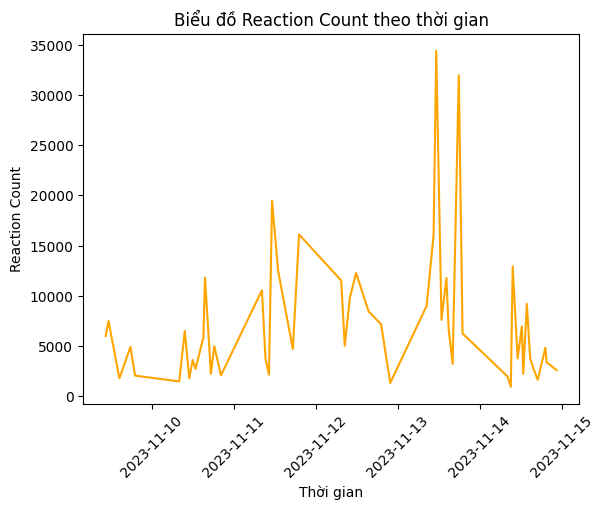

In [145]:

plt.plot(dates1, reaction_list1, color= 'orange')
plt.xticks(rotation=45)

plt.title('Biểu đồ Reaction Count theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Reaction Count')

plt.show()


In [146]:
dates2 = data_from_15_to_20['time'].to_list()
reaction_list2 = data_from_15_to_20['reaction_count'].to_list()
dates2.reverse()
reaction_list2.reverse()

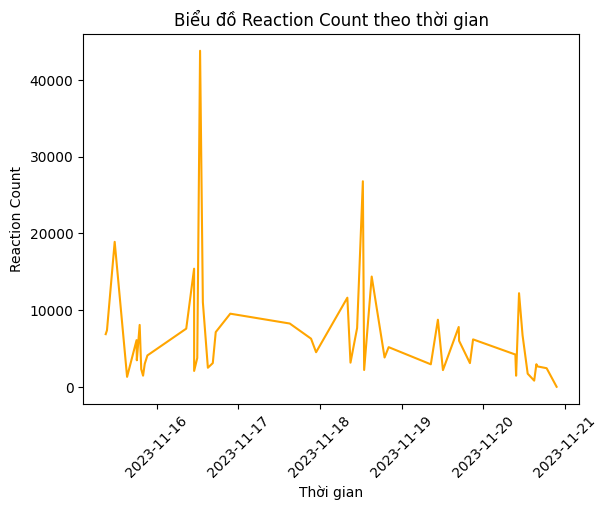

In [147]:
plt.plot(dates2, reaction_list2, color= 'orange')
plt.xticks(rotation=45)

plt.title('Biểu đồ Reaction Count theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Reaction Count')

plt.show()


2. Mean


In [148]:
data_from_9_to_14['reaction_count'].mean()

7329.823529411765

In [149]:
data_from_15_to_20['reaction_count'].mean()

6868.551020408163

In [150]:
len(data_from_9_to_14[data_from_9_to_14['reaction_count'] >= 10000])

12

In [151]:
len(data_from_15_to_20[data_from_15_to_20['reaction_count'] >= 10000])

8

In [152]:
data_from_15_to_20[data_from_15_to_20['yêu thích'] >= 1000]

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,was_live,fetched_time,day,thích,haha,yêu thích,wow,thương thương,buồn,phẫn nộ
21,729096335925726,thầy cưng xỉu,thầy cưng xỉu,NaN,NaN,2023-11-18 12:37:01,1700285821,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:49:41.266067,18,12841.0,8554.0,4994.0,22.0,336.0,37.0,3.0
24,728997442602282,giáo viên toi mong ước được học 🥹,giáo viên toi mong ước được học 🥹,NaN,NaN,2023-11-18 08:03:33,1700269413,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:50:31.269810,18,7628.0,91.0,3774.0,9.0,114.0,29.0,0.0
33,727851522716874,văn nghệ cháy nhất 20.11 theo đúng nghĩa đen,văn nghệ cháy nhất 20.11 theo đúng nghĩa đen,NaN,NaN,2023-11-16 12:45:34,1700113534,NaN,https://scontent.fhan5-1.fna.fbcdn.net/v/t15.5...,[],...,False,2023-11-20 21:53:35.942706,16,27152.0,6580.0,9309.0,526.0,139.0,48.0,0.0
44,727406946094665,✨nam sinh lớp 9 ở lào cai đạt ielts 8.5✨\n\nmi...,✨nam sinh lớp 9 ở lào cai đạt ielts 8.5✨\n\nmi...,NaN,NaN,2023-11-15 18:05:30,1700046330,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-20 21:56:31.533606,15,4106.0,69.0,1057.0,707.0,36.0,148.0,1.0


In [153]:
data_from_9_to_14[data_from_9_to_14['reaction_count'] >= 16000]

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,was_live,fetched_time,day,thích,haha,yêu thích,wow,thương thương,buồn,phẫn nộ
63,726319276203432,tôi làm được,tôi làm được,NaN,NaN,2023-11-13 17:48:20,1699872500,NaN,https://scontent.fhan5-1.fna.fbcdn.net/v/t15.5...,[],...,False,2023-11-20 22:00:50.512976,13,9614.0,17125.0,233.0,65.0,59.0,4875.0,7.0
68,726169796218380,vi thần đời thứ 2,vi thần đời thứ 2,NaN,NaN,2023-11-13 11:12:48,1699848768,https://scontent.fsgn5-3.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-3.fna.fbcdn.net/v/t39...,...,False,2023-11-20 22:02:40.673702,13,22682.0,972.0,791.0,3675.0,55.0,6229.0,1.0
69,726154222886604,thương quá :'(,thương quá :'(,NaN,NaN,2023-11-13 10:26:21,1699845981,https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-9.fna.fbcdn.net/v/t39...,...,False,2023-11-20 22:02:56.551874,13,8800.0,37.0,86.0,38.0,26.0,7068.0,7.0
78,725164246318935,những hình p.h.ạ.t mà thuý kiều sử dụn...,những hình p.h.ạ.t mà thuý kiều sử dụn...,NaN,NaN,2023-11-11 19:05:14,1699704314,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...,...,False,2023-11-20 22:06:03.860833,11,10585.0,1317.0,166.0,183.0,15.0,3840.0,6.0
81,724996263002400,bất ngờ chưa =))),bất ngờ chưa =))),NaN,NaN,2023-11-11 11:11:05,1699675865,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...,...,False,2023-11-20 22:07:28.655535,11,6376.0,5554.0,77.0,57.0,17.0,7336.0,44.0


In [154]:
data_from_15_to_20[data_from_15_to_20['reaction_count'] >= 10000]

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,was_live,fetched_time,day,thích,haha,yêu thích,wow,thương thương,buồn,phẫn nộ
7,730294602472566,cảm động tình cô trò 😵,cảm động tình cô trò 😵,NaN,NaN,2023-11-20 10:31:51,1700451111,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-20 21:45:54.766510,20,4016.0,6887.0,41.0,22.0,20.0,1238.0,6.0
19,729152762586750,khi trời lạnh mà đòi bật quạt :3,khi trời lạnh mà đòi bật quạt :3,NaN,NaN,2023-11-18 15:12:58,1700295178,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-20 21:49:22.093849,18,4090.0,10026.0,27.0,17.0,6.0,228.0,1.0
21,729096335925726,thầy cưng xỉu,thầy cưng xỉu,NaN,NaN,2023-11-18 12:37:01,1700285821,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:49:41.266067,18,12841.0,8554.0,4994.0,22.0,336.0,37.0,3.0
24,728997442602282,giáo viên toi mong ước được học 🥹,giáo viên toi mong ước được học 🥹,NaN,NaN,2023-11-18 08:03:33,1700269413,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:50:31.269810,18,7628.0,91.0,3774.0,9.0,114.0,29.0,0.0
32,727869312715095,oke luôn,oke luôn,NaN,NaN,2023-11-16 13:34:47,1700116487,https://scontent.fhan15-1.fna.fbcdn.net/v/t39....,https://scontent.fhan5-10.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-1.fna.fbcdn.net/v/t3...,...,False,2023-11-20 21:53:19.781612,16,5311.0,4298.0,63.0,17.0,16.0,1355.0,7.0
33,727851522716874,văn nghệ cháy nhất 20.11 theo đúng nghĩa đen,văn nghệ cháy nhất 20.11 theo đúng nghĩa đen,NaN,NaN,2023-11-16 12:45:34,1700113534,NaN,https://scontent.fhan5-1.fna.fbcdn.net/v/t15.5...,[],...,False,2023-11-20 21:53:35.942706,16,27152.0,6580.0,9309.0,526.0,139.0,48.0,0.0
36,727814949387198,có thiệc sự là chiếc lược ngà hong 🥲,có thiệc sự là chiếc lược ngà hong 🥲,NaN,NaN,2023-11-16 10:59:56,1700107196,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:54:17.265998,16,5622.0,8081.0,213.0,21.0,25.0,1450.0,4.0
46,727268742775152,họp lớp belike:,họp lớp belike:,NaN,NaN,2023-11-15 11:39:24,1700023164,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:56:58.488065,15,7355.0,11027.0,40.0,14.0,18.0,454.0,0.0


In [155]:
data = pro_df[['text', 'reaction_count']].sort_values(by= 'reaction_count', ascending= False)
data.head(20)



,text,reaction_count
33,văn nghệ cháy nhất 20.11 theo đúng nghĩa đen,43754
68,vi thần đời thứ 2,34405
63,tôi làm được,31978
21,thầy cưng xỉu,26787
81,bất ngờ chưa =))),19461
46,họp lớp belike:,18908
78,những hình p.h.ạ.t mà thuý kiều sử dụn...,16112
69,thương quá :'(,16062
36,có thiệc sự là chiếc lược ngà hong 🥲,15416
19,khi trời lạnh mà đòi bật quạt :3,14395


3. Từng loại reations

In [156]:
len(data_from_9_to_14[pro_df['haha'] >= 4000])

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\496295622.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data_from_9_to_14[pro_df['haha'] >= 4000])


12

In [157]:
len(data_from_9_to_14[pro_df['buồn'] >= 4000])

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\2658565286.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data_from_9_to_14[pro_df['buồn'] >= 4000])


5

In [158]:
len(data_from_15_to_20[pro_df['haha'] >= 4000])

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\353158505.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data_from_15_to_20[pro_df['haha'] >= 4000])


11

In [159]:
len(data_from_15_to_20[pro_df['buồn'] >= 4000])

C:\Users\AD\AppData\Local\Temp\ipykernel_29868\3548168768.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data_from_15_to_20[pro_df['buồn'] >= 4000])


1

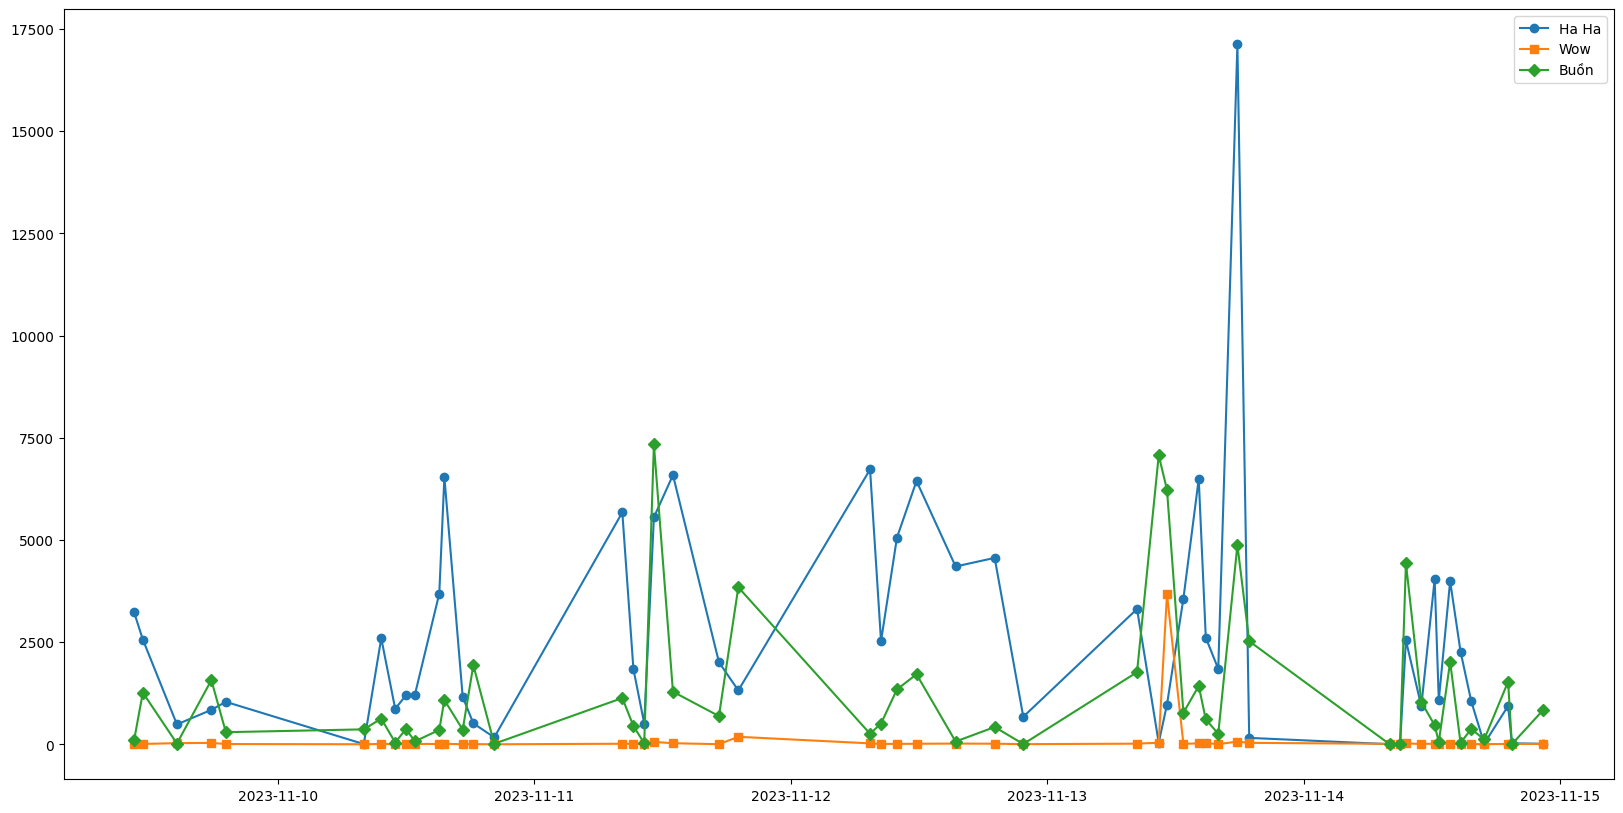

In [160]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_from_9_to_14['time'], data_from_9_to_14['haha'], label = "Ha Ha", marker="o")
ax.plot(data_from_9_to_14['time'], data_from_9_to_14['wow'], label = "Wow", marker="s")
ax.plot(data_from_9_to_14['time'], data_from_9_to_14['buồn'], label = "Buồn", marker="D")

plt.legend()
plt.show()

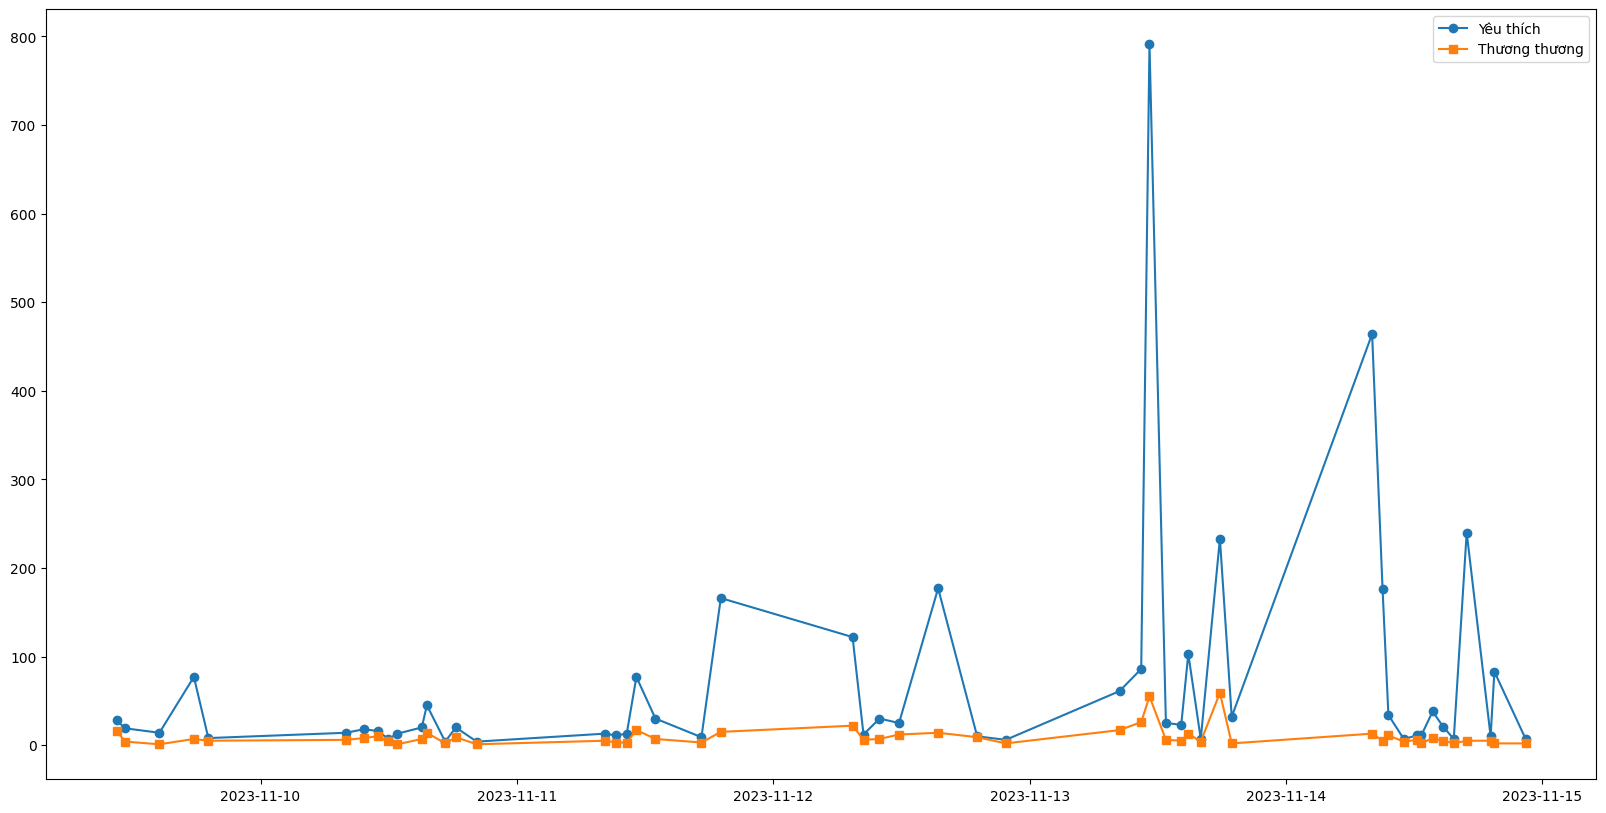

In [161]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_from_9_to_14['time'], data_from_9_to_14['yêu thích'], label = "Yêu thích", marker="o")
ax.plot(data_from_9_to_14['time'], data_from_9_to_14['thương thương'], label = "Thương thương", marker="s")

plt.legend()
plt.show()

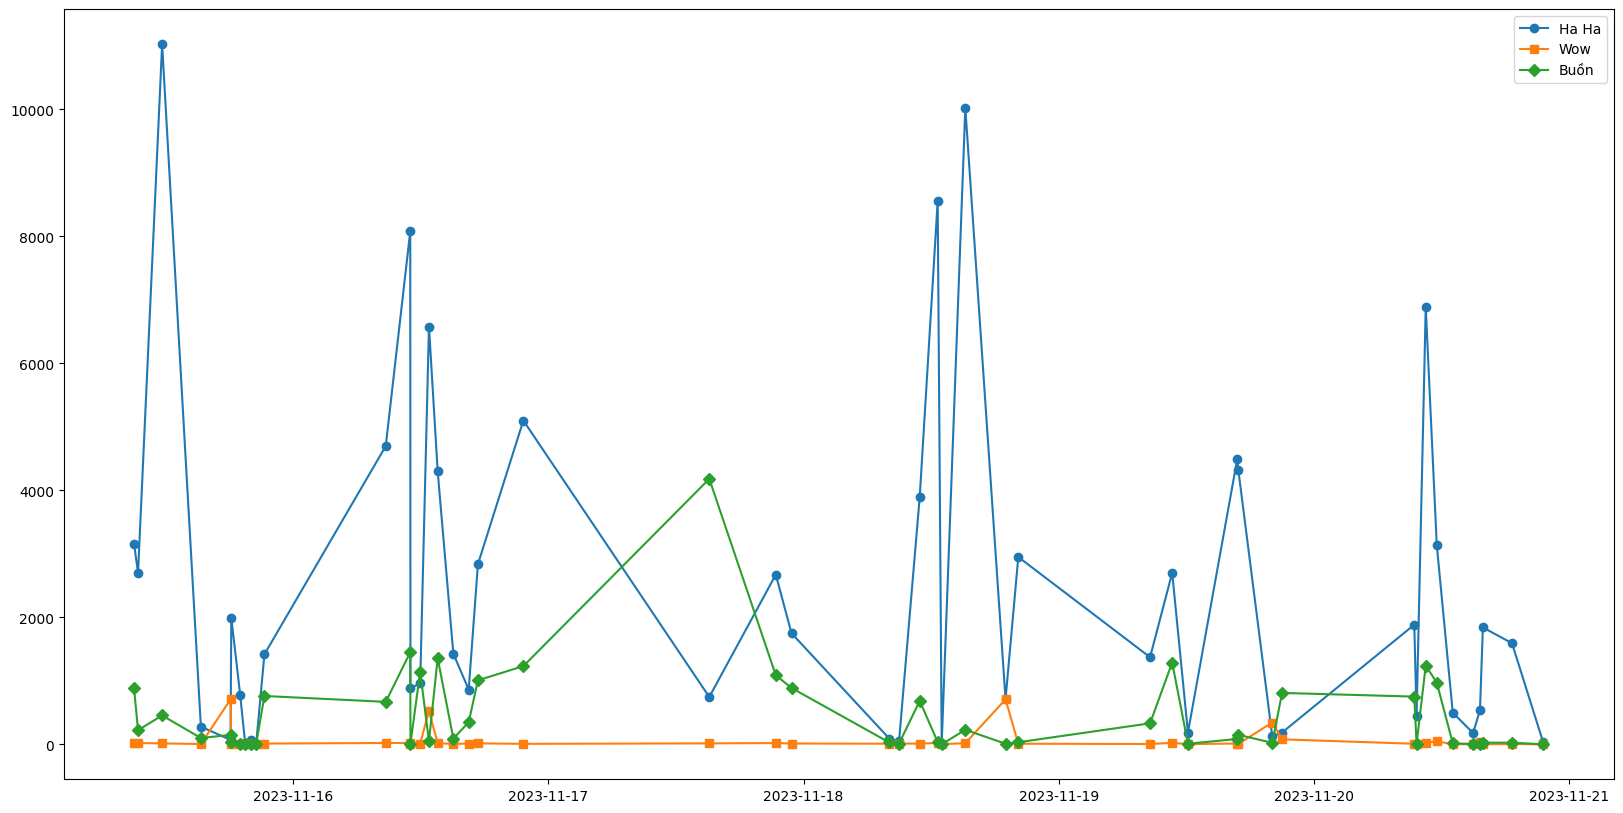

In [162]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_from_15_to_20['time'], data_from_15_to_20['haha'], label = "Ha Ha", marker="o")
ax.plot(data_from_15_to_20['time'], data_from_15_to_20['wow'], label = "Wow", marker="s")
ax.plot(data_from_15_to_20['time'], data_from_15_to_20['buồn'], label = "Buồn", marker="D")

plt.legend()
plt.show()

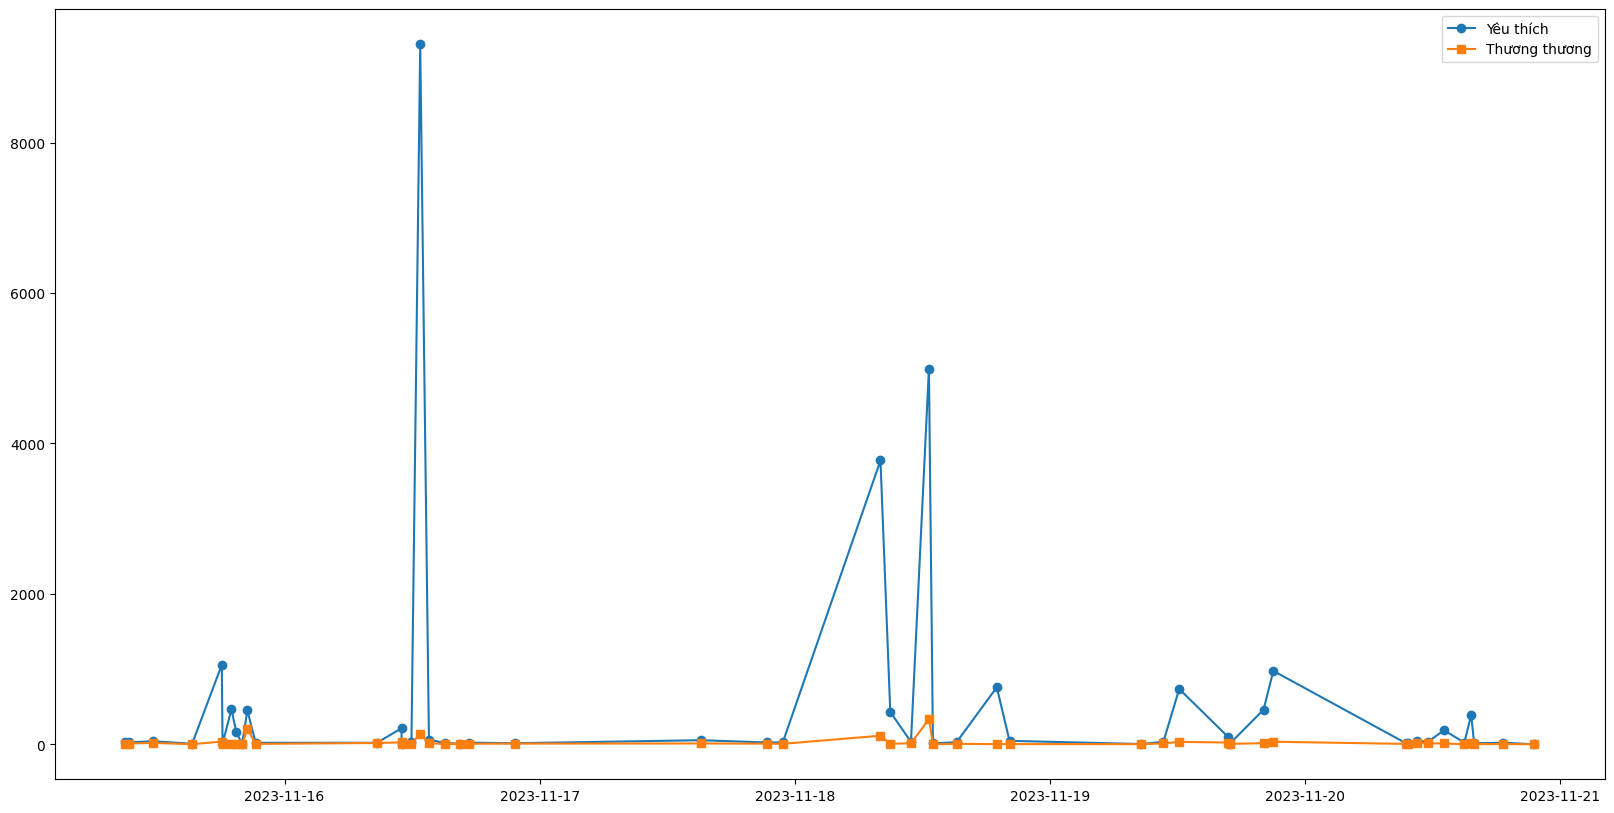

In [163]:

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_from_15_to_20['time'], data_from_15_to_20['yêu thích'], label = "Yêu thích", marker="o")
ax.plot(data_from_15_to_20['time'], data_from_15_to_20['thương thương'], label = "Thương thương", marker="s")

plt.legend()
plt.show()

3. `Các mốc thời gian trong ngày mà fanpage hay đăng bài viết`

In [164]:
pro_df[['text', 'timestamp', 'time']]

,text,timestamp,time
0,tên ở nhà của bạn là gì?,1700490874,2023-11-20 21:34:34
1,mê cái cách lớp tặng quà 20/11 cho cô :3,1700480327,2023-11-20 18:38:47
2,mấy đứa nhát gái kiểu:,1700470467,2023-11-20 15:54:27
3,tốt nghiệp đại học luật nhưng thơ nguyễn vẫn q...,1700469479,2023-11-20 15:37:59
4,“bác sĩ mở phòng khám tư thì giáo viên dạy thê...,1700467149,2023-11-20 14:59:09
...,...,...,...
95,thời tớiiiiiii,1699531618,2023-11-09 19:06:58
96,bài tập của chuyên anh :3,1699526734,2023-11-09 17:45:34
97,trường học có nhà vệ sinh học sinh trị giá 600...,1699515125,2023-11-09 14:32:05
98,học kiểu gì vậy??,1699503639,2023-11-09 11:20:39


In [165]:
posting_frequency_per_day = pro_df.loc[pro_df['day'] == 15]
posting_frequency_per_day

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,was_live,fetched_time,day,thích,haha,yêu thích,wow,thương thương,buồn,phẫn nộ
38,727499809418712,mùa đông của các bạn thì sao ??,mùa đông của các bạn thì sao ??,NaN,NaN,2023-11-15 21:16:43,1700057803,https://scontent.fhan5-10.fna.fbcdn.net/v/t39....,https://scontent.fhan5-10.fna.fbcdn.net/v/t39....,['https://scontent.fhan5-10.fna.fbcdn.net/v/t3...,...,False,2023-11-20 21:54:56.685126,15,1919.0,1417.0,20.0,11.0,5.0,761.0,5.0
39,727323216103038,"💖 không nói lời yêu nào, nhưng tất cả đều là t...","💖 không nói lời yêu nào, nhưng tất cả đều là t...",NaN,NaN,2023-11-15 20:30:00,1700055000,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-6.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:55:33.359655,15,2394.0,0.0,450.0,0.0,205.0,0.0,0.0
40,727379166097443,"game này là dễ rồi 😋\ntoàn thiên tài hội họa, ...","game này là dễ rồi 😋\ntoàn thiên tài hội họa, ...",NaN,NaN,2023-11-15 20:00:02,1700053202,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-20 21:55:44.116734,15,1427.0,65.0,7.0,3.0,0.0,1.0,0.0
41,727441082757918,đại học y dược thành phố hồ chí minh cùng với ...,đại học y dược thành phố hồ chí minh cùng với ...,NaN,NaN,2023-11-15 19:27:39,1700051259,https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn5-9.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:55:58.924840,15,2153.0,27.0,159.0,6.0,7.0,1.0,0.0
42,727407329427960,bí quyết để “bẹo hình bẹo dạng” một cách nhanh...,bí quyết để “bẹo hình bẹo dạng” một cách nhanh...,NaN,NaN,2023-11-15 19:00:07,1700049607,https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...,https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkt1-2.xx.fbcdn.net/v/t39.3...,...,False,2023-11-20 21:56:04.648170,15,6863.0,774.0,464.0,1.0,2.0,1.0,0.0
43,727408546094505,đi học như đi nghỉ mát :3,đi học như đi nghỉ mát :3,NaN,NaN,2023-11-15 18:09:53,1700046593,https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...,https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkt1-2.xx.fbcdn.net/v/t39.3...,...,False,2023-11-20 21:56:09.344104,15,1445.0,1991.0,11.0,10.0,5.0,43.0,0.0
44,727406946094665,✨nam sinh lớp 9 ở lào cai đạt ielts 8.5✨\n\nmi...,✨nam sinh lớp 9 ở lào cai đạt ielts 8.5✨\n\nmi...,NaN,NaN,2023-11-15 18:05:30,1700046330,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-hkt1-2.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-20 21:56:31.533606,15,4106.0,69.0,1057.0,707.0,36.0,148.0,1.0
45,727340072768019,"phạm thành long (23 tuổi, quê bắc ninh) tốt ng...","phạm thành long (23 tuổi, quê bắc ninh) tốt ng...",NaN,NaN,2023-11-15 15:18:08,1700036288,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fsgn5-6.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-20 21:56:45.811630,15,959.0,278.0,7.0,4.0,1.0,99.0,0.0
46,727268742775152,họp lớp belike:,họp lớp belike:,NaN,NaN,2023-11-15 11:39:24,1700023164,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...,...,False,2023-11-20 21:56:58.488065,15,7355.0,11027.0,40.0,14.0,18.0,454.0,0.0
47,727217576113602,chuyển trường hay chiến đấu 🤨,chuyển trường hay chiến đấu 🤨,NaN,NaN,2023-11-15 09:23:27,1700015007,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-10.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-20 21:57:22.536711,15,4418.0,2704.0,27.0,19.0,10.0,222.0,5.0


C:\Users\AD\AppData\Local\Temp\ipykernel_29868\2760677592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posting_frequency_per_day['hour'] = posting_frequency_per_day['time'].dt.hour


Text(0, 0.5, 'Số bài đăng')

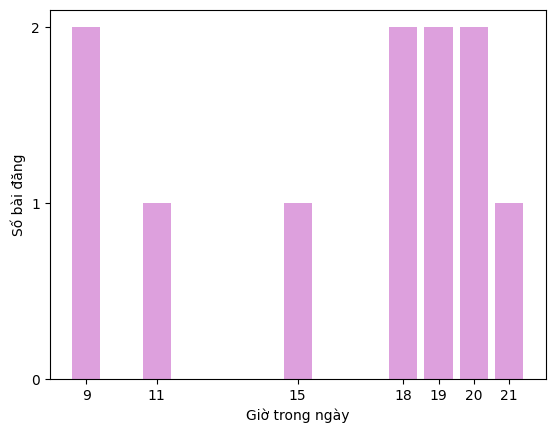

In [166]:
posting_frequency_per_day = pro_df.loc[pro_df['day'] == 15]
posting_frequency_per_day['hour'] = posting_frequency_per_day['time'].dt.hour

hourly_post_counts = posting_frequency_per_day['hour'].sort_values().value_counts()
hours_with_posts = hourly_post_counts.index

plt.bar(hourly_post_counts.index, hourly_post_counts.values, color='plum')

plt.xticks(hours_with_posts)
plt.yticks(range(int(hourly_post_counts.max()) + 1))
# Đặt tên cho trục x và y
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số bài đăng')




4. `Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng thu được`

In [167]:

text = "" 
for i in pro_df['post_text']:
  text=text+i+"\n"

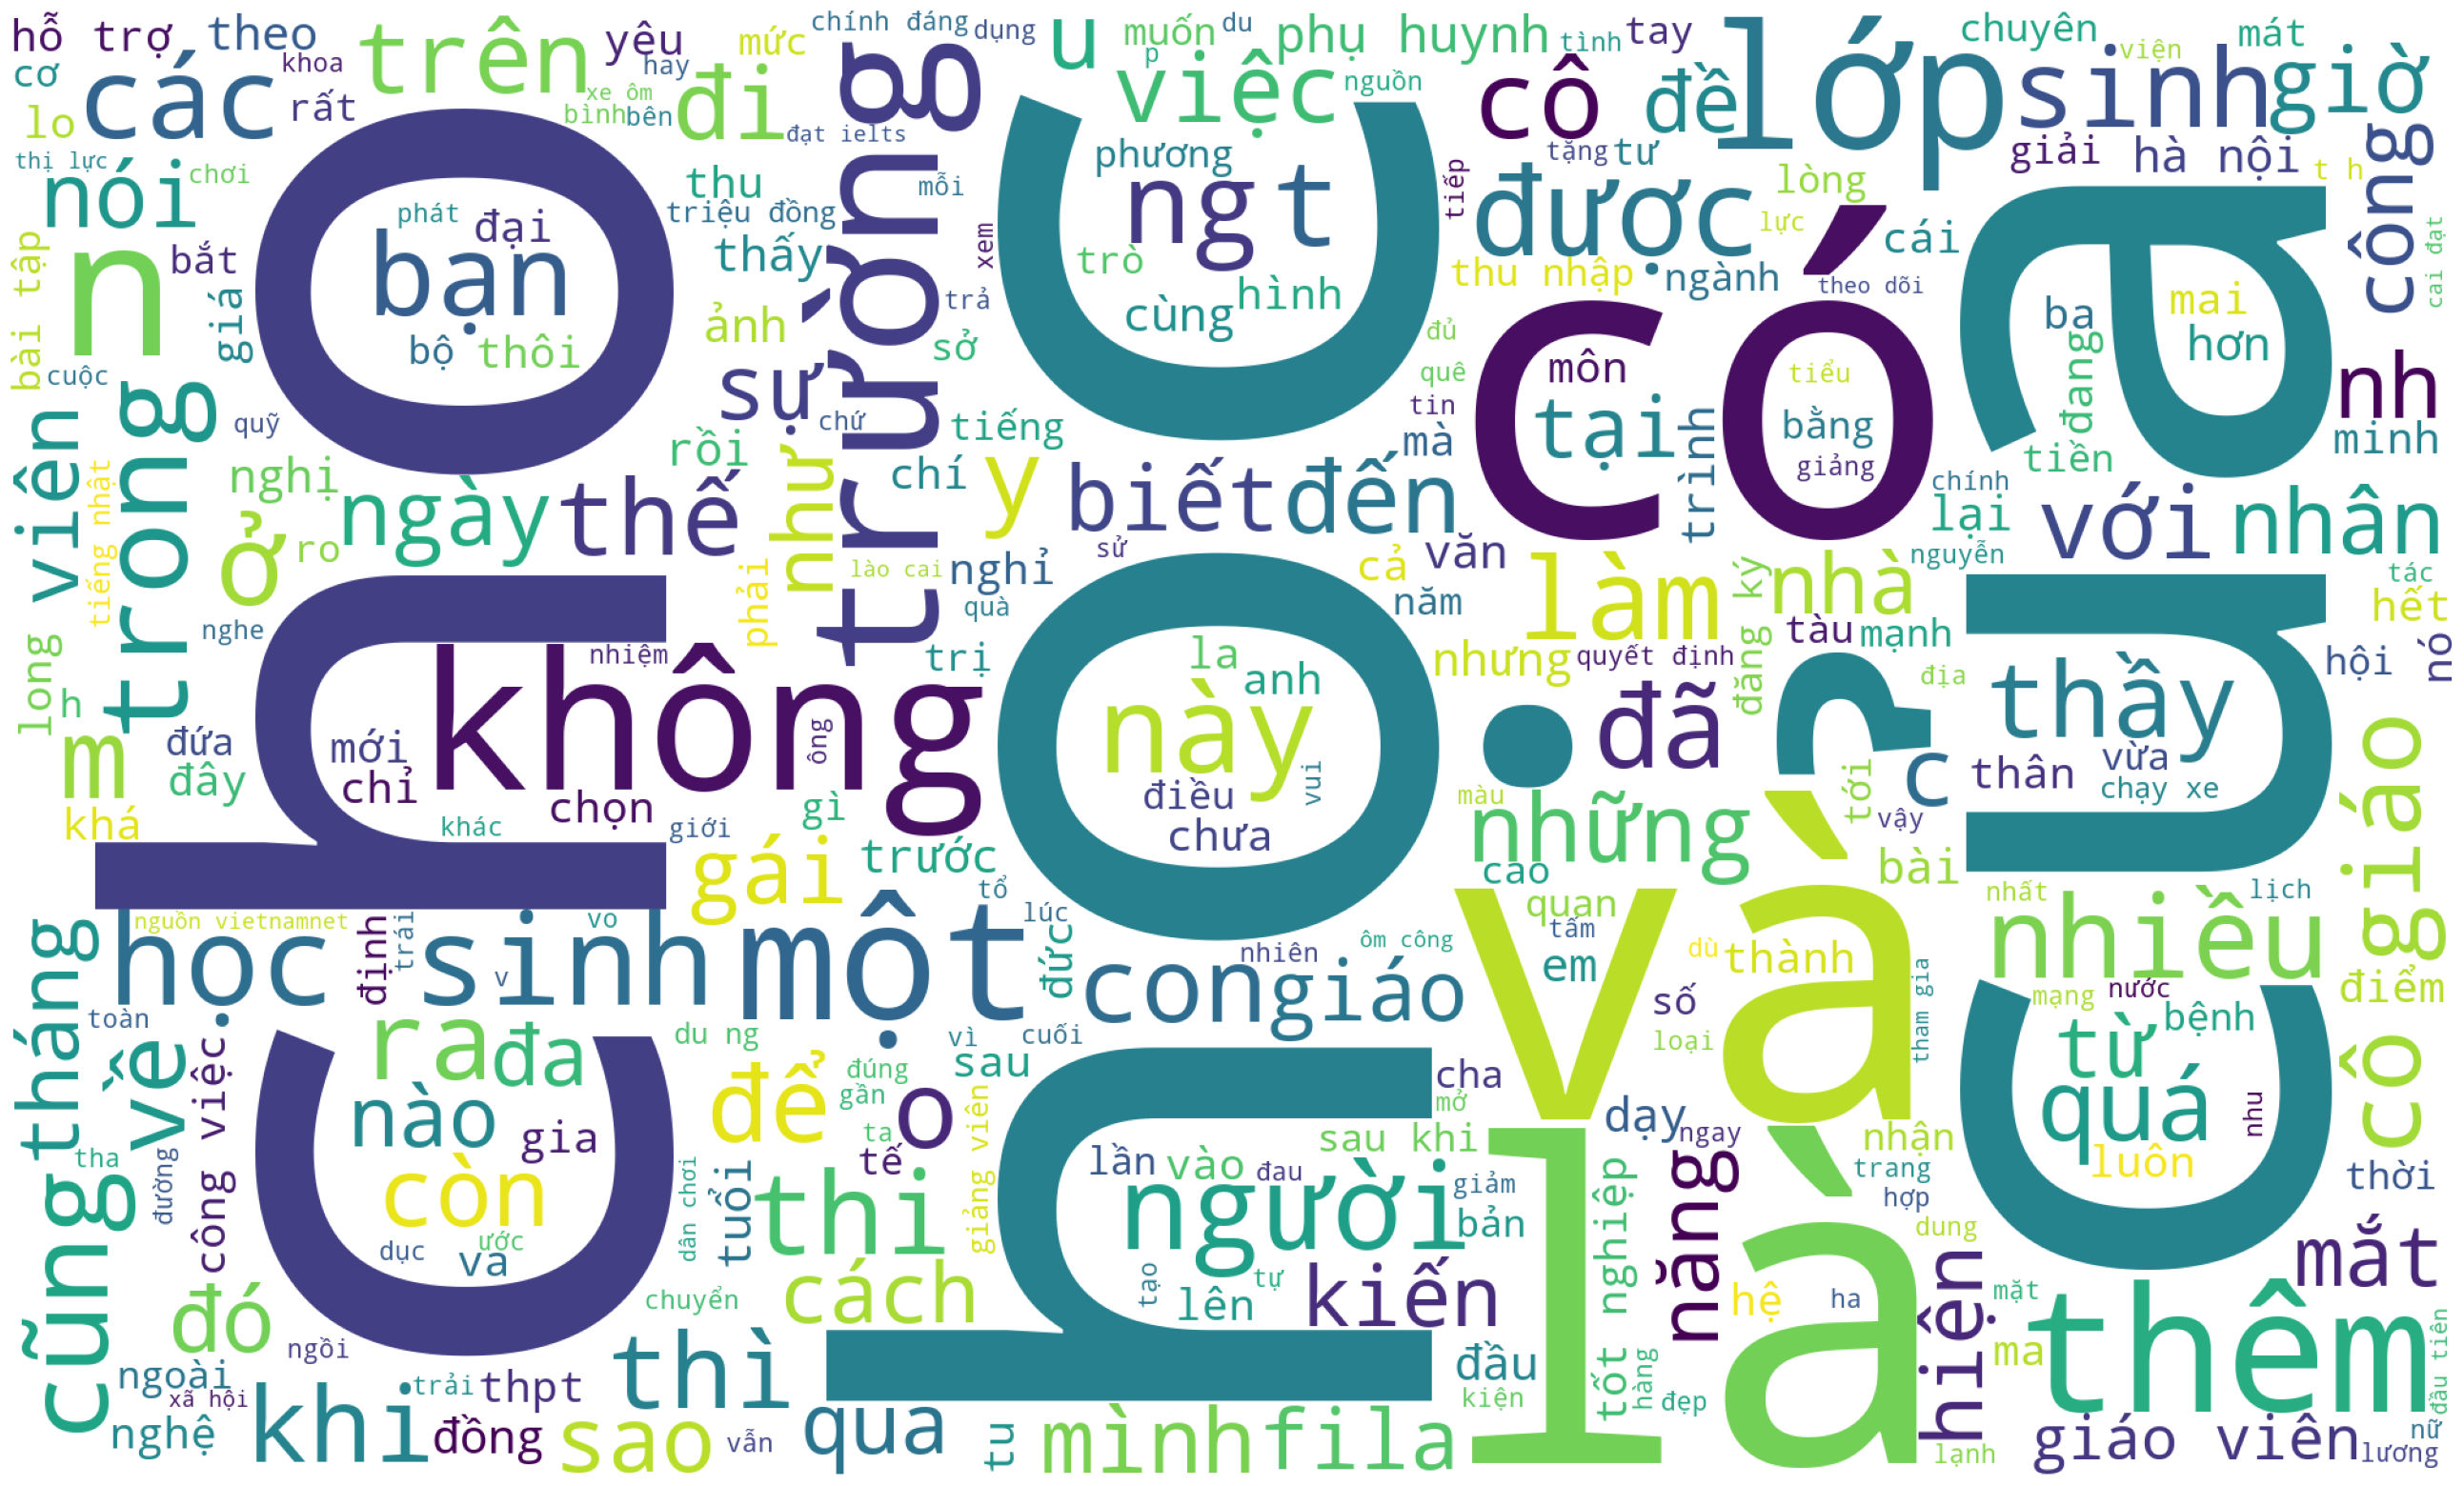

In [168]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

5. `Sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết,..`

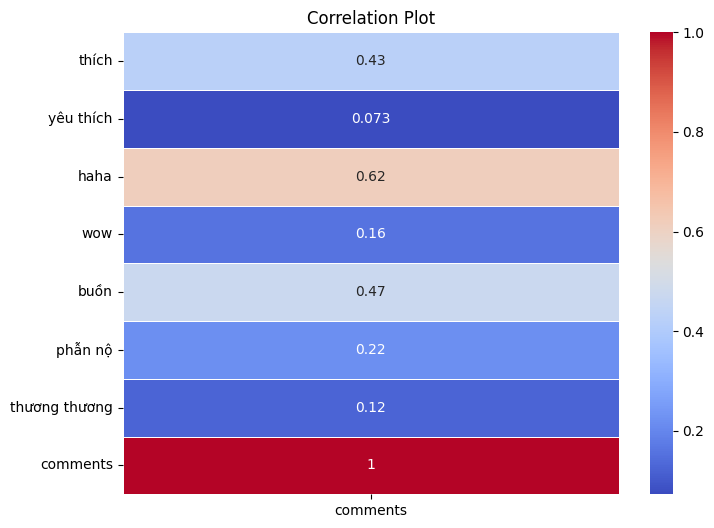

In [169]:


data_reations = pro_df[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'comments']]

# Tính ma trận tương quan
data_for_corr = data_reations.corr()

# Lấy ma trận tương quan của 'comments' với các biến khác
correlation_with_comments = data_for_corr['comments'].to_frame()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_comments, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Plot")
plt.show()

In [170]:
pro_df['post_length'] = pro_df['post_text'].apply(lambda x : len(str(x)))
pro_df['post_length']

0      24
1      40
2      22
3      68
4     856
     ... 
95     14
96     25
97    301
98     17
99     16
Name: post_length, Length: 100, dtype: int64

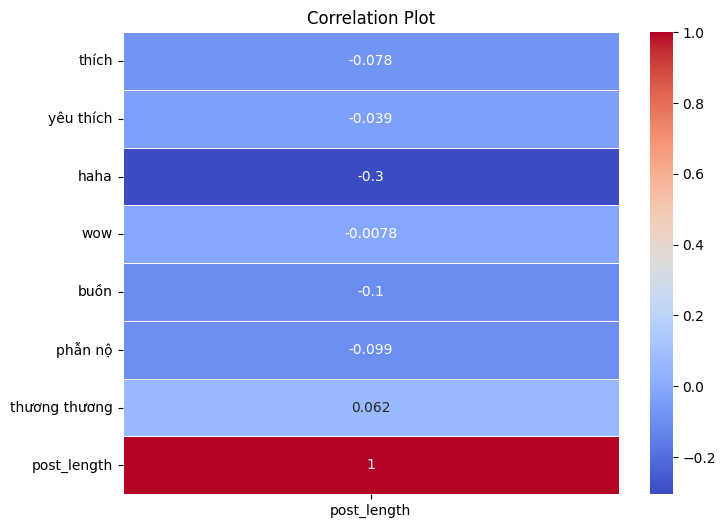

In [171]:

data_reations1 = pro_df[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'post_length']]

# Tính ma trận tương quan
data_for_corr1 = data_reations1.corr()

# Lấy ma trận tương quan của 'comments' với các biến khác
correlation_with_post_length1 = data_for_corr1['post_length'].to_frame()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_post_length1, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Plot")
plt.show()

In [172]:
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        100 non-null    int64         
 1   text                           100 non-null    object        
 2   post_text                      100 non-null    object        
 3   shared_text                    0 non-null      float64       
 4   original_text                  0 non-null      float64       
 5   time                           100 non-null    datetime64[ns]
 6   timestamp                      100 non-null    int64         
 7   image                          93 non-null     object        
 8   image_lowquality               100 non-null    object        
 9   images                         100 non-null    object        
 10  images_description             100 non-null    object        
 11  images_lowquality   

In [173]:
pro_df['image'].isna().value_counts()

image
False    93
True      7
Name: count, dtype: int64

In [174]:
pro_df['image']

0                                                   NaN
1     https://scontent.fhan15-1.fna.fbcdn.net/v/t39....
2                                                   NaN
3     https://m.facebook.com/photo/view_full_size/?f...
4                                                   NaN
                            ...                        
95    https://scontent.fsgn5-5.fna.fbcdn.net/v/t39.3...
96    https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...
97    https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...
98    https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...
99    https://scontent.fsgn5-9.fna.fbcdn.net/v/t39.3...
Name: image, Length: 100, dtype: object

In [175]:
pro_df[(pro_df['video'].isna()) & (pro_df['image'].isna())][['text','time', 'image', 'video']]

,text,time,image,video
4,“bác sĩ mở phòng khám tư thì giáo viên dạy thê...,2023-11-20 14:59:09,NaN,NaN
9,cãi làm sao được=))),2023-11-20 09:27:11,NaN,NaN
